<>:53: SyntaxWarning: invalid escape sequence '\B'
<>:53: SyntaxWarning: invalid escape sequence '\B'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_28680\1056852482.py:53: SyntaxWarning: invalid escape sequence '\B'
  test_image_path = "Dataset AI\Brian Alexander\IMG-20241025-WA0018.jpg"  # Replace with your image path


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Michael Wijaya
Confidence: 0.92


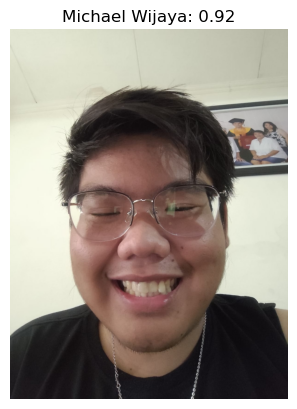

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Class: Michael Wijaya
Confidence: 0.70


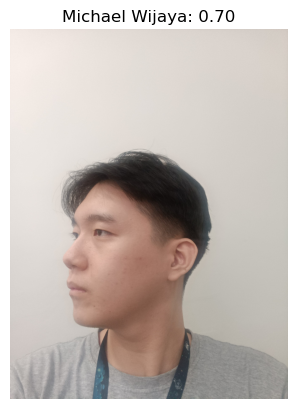

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted Class: Tom Cruise
Confidence: 0.51


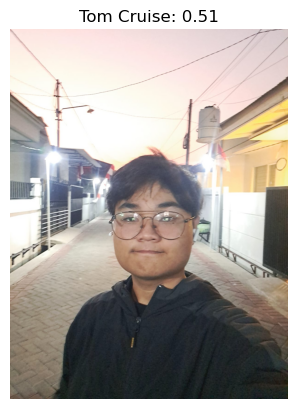

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Predicted Class: Jennifer Lawrence
Confidence: 1.00


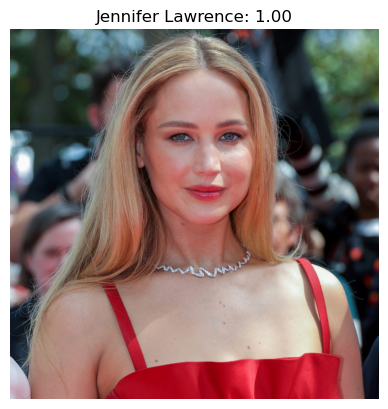

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Class: Johnny Depp
Confidence: 0.88


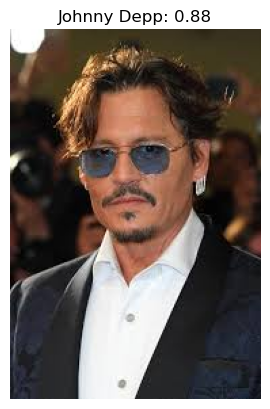

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Class: Robert Dawney Jr
Confidence: 1.00


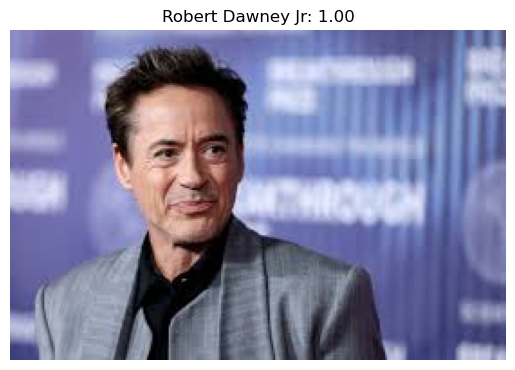

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Class: Leonardo Dicaprio
Confidence: 0.94


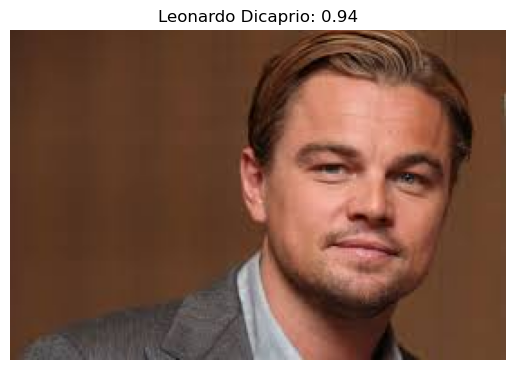

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Class: Megan Fox
Confidence: 0.99


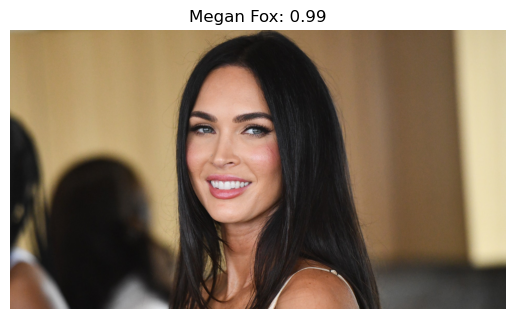

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Class: Scarlet Johansson
Confidence: 1.00


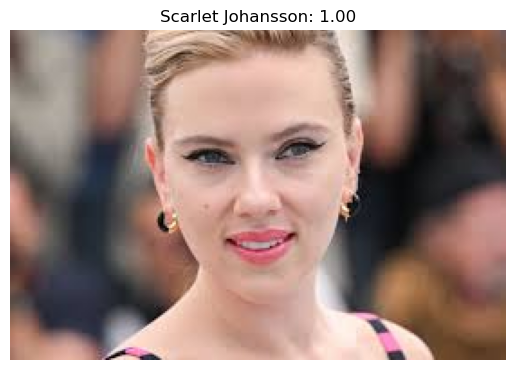

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Class: Tom Cruise
Confidence: 0.80


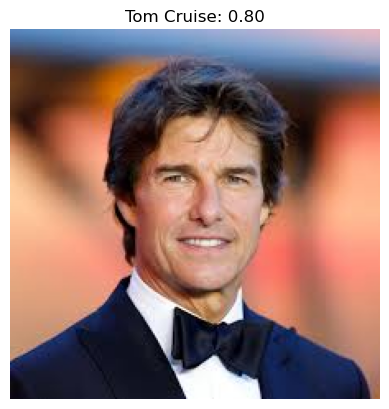

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Class: Tom Hanks
Confidence: 0.98


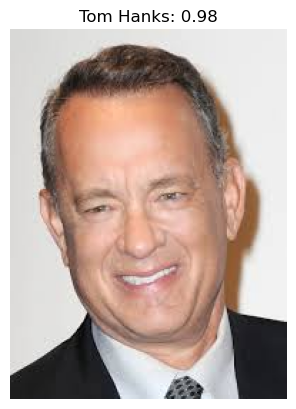

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Class: Will Smith
Confidence: 1.00


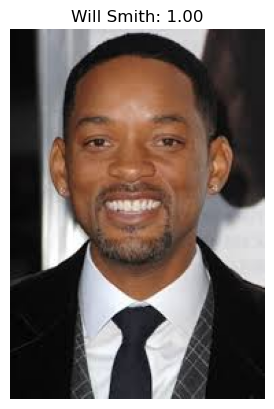

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("best_face_recognition_model.keras")

# Class labels (update these with your dataset class names)
class_labels = ['Jennifer Lawrence', 'Johnny Depp', 'Leonardo Dicaprio', 'Megan Fox', 'Michael Wijaya', 'Robert Dawney Jr', 'Scarlet Johansson', 'Tom Cruise', 'Tom Hanks', 'Will Smith']
classlabs = ['Brian', 'Michael']

def predict_image(image_path):
    """
    Predict the class of a single image using the trained model.
    
    Args:
        image_path (str): Path to the image file.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return
    
    # Convert BGR to RGB (for displaying with matplotlib)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Preprocess the image
    resized_image = cv2.resize(image, (299, 299))  # Resize to match model input size
    preprocessed_image = preprocess_input(np.expand_dims(resized_image, axis=0))  # Add batch dimension
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions)
    confidence = np.max(predictions)
    predicted_class = class_labels[predicted_class_index]
    
    # Display the results
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")
    
    # Display the image with prediction
    plt.imshow(rgb_image)
    plt.title(f"{predicted_class}: {confidence:.2f}")
    plt.axis("off")
    plt.show()

# Test the function with an example image
test_image_path = "Mike1.jpg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "Dataset AI\Brian Alexander\IMG-20241025-WA0018.jpg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "Sindu4.jpg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "jl.jpg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "JD.jpeg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "RDJ.jpeg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "LD.jpeg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "MF.jpg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "Sc.jpg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "TC1.jpg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "TH.jpeg"  # Replace with your image path
predict_image(test_image_path)
test_image_path = "WS.jpeg"  # Replace with your image path
predict_image(test_image_path)



In [14]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Initialize the camera
camera = cv2.VideoCapture(0)  # 0 for default webcam, or replace with video file path

# Set frame size for consistency (optional)
frame_width, frame_height = 640, 480
camera.set(cv2.CAP_PROP_FRAME_WIDTH, frame_width)
camera.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_height)

# Real-time processing
while True:
    ret, frame = camera.read()
    if not ret:
        print("Failed to grab frame.")
        break

    # Preprocess the frame
    resized_frame = cv2.resize(frame, (299, 299))  # Resize to model input size
    preprocessed_frame = preprocess_input(np.expand_dims(resized_frame, axis=0))  # Add batch dimension
    
    # Make prediction
    predictions = model.predict(preprocessed_frame)
    predicted_class_index = np.argmax(predictions)
    confidence = np.max(predictions)
    predicted_class = class_labels[predicted_class_index]

    # Overlay prediction on the frame
    label = f"{predicted_class}: {confidence:.2f}"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Face Recognition", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
camera.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━